In [2]:
pip install pandas scikit-learn matplotlib tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 23.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 21.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.0 MB/s

 1. Load and Prepare the Dataset

In [4]:
import pandas as pd

# Load the white wine dataset
df = pd.read_csv("winequality-white.csv", sep=';')

# Convert quality to binary: Good wine (quality >= 6) = 1, else 0
df['quality_binary'] = (df['quality'] >= 6).astype(int)

# Display first few rows
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


 2. Feature Selection and Preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['quality', 'quality_binary'])  # 11 input features
y = df['quality_binary']  # Binary target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


3. Build the Neural Network Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the MLP architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input + first hidden layer
    Dense(16, activation='relu'),                                   # Second hidden layer
    Dense(1, activation='sigmoid')                                  # Output layer for binary classification
])


2025-05-06 15:49:38.215410: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4. Compile the Model

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

# Compile the model with binary crossentropy loss and AUC metric
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)


5. Train the Model

In [8]:
# Train the model and store the training history
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6227 - auc: 0.6075 - loss: 0.6540 - val_accuracy: 0.7321 - val_auc: 0.7503 - val_loss: 0.5627
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7487 - auc: 0.7838 - loss: 0.5446 - val_accuracy: 0.7513 - val_auc: 0.7958 - val_loss: 0.5154
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7662 - auc: 0.8137 - loss: 0.4988 - val_accuracy: 0.7602 - val_auc: 0.8078 - val_loss: 0.5006
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7753 - auc: 0.8304 - loss: 0.4713 - val_accuracy: 0.7628 - val_auc: 0.8136 - val_loss: 0.4947
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7992 - auc: 0.8443 - loss: 0.4509 - val_accuracy: 0.7640 - val_auc: 0.8172 - val_loss: 0.4908
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7805 - auc: 0.8319 - loss: 0.4727 - val_accuracy: 0.7666 - val_auc: 0.8177 - val_loss: 0.4893
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 

6. Evaluate the Model on Test Data

In [9]:
# Evaluate model performance on test set
loss, accuracy, auc = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7719 - auc: 0.8465 - loss: 0.4513
Test Loss: 0.4572
Test Accuracy: 0.7765
Test AUC: 0.8417


A test accuracy of 77.65% indicates that the model performs well on unseen data, successfully distinguishing good vs. not-good wines most of the time.

The AUC score of 0.8417 suggests strong classification ability — AUC values above 0.80 generally reflect good model performance in terms of balancing true positive and false positive rates.

The relatively low test loss (0.4572) further supports that the model generalizes decently without overfitting.

7. Visualize Training and Validation Accuracy

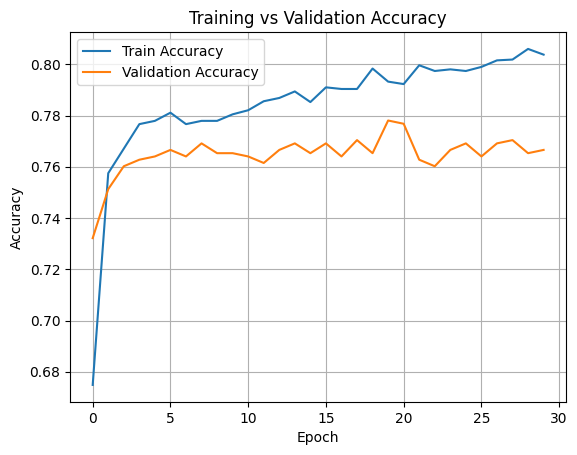

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
plt.savefig("training_vs_validation_accuracy.png")


<Figure size 640x480 with 0 Axes>

Key Observations:
The training accuracy steadily increases and eventually reaches ~82% by epoch 30.

Validation accuracy starts around 74%, peaks near 77–78%, and flattens around 76–77%, showing some early saturation.

Interpretation:
The gap between training and validation accuracy (~5%) suggests mild overfitting, but it is not severe.

Training dynamics are stable, with no sudden drops or spikes, indicating a well-tuned learning rate and architecture.

The model may benefit from:

Early stopping to prevent overfitting beyond epoch 20–25.

Adding Dropout layers for regularization if further generalization is needed.

Experimenting with more hidden units or batch size adjustments to enhance learning.

